In [1]:
class Node1:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None
        self.parent = None

class BinaryTree:
    def __init__(self):
        self.root = None

    def search(self, data):
        current = self.root
        while current is not None and current.data != data:
            if data < current.data:
                current = current.left
            else:
                current = current.right
        return current

    def minimum(self, node):
        while node.left is not None:
            node = node.left
        return node

    def maximum(self, node):
        while node.right is not None:
            node = node.right
        return node

    def successor(self, node):
        if node.right is not None:
            return self.minimum(node.right)
        parent = node.parent
        while parent is not None and node == parent.right:
            node = parent
            parent = parent.parent
        return parent

    def predecessor(self, node):
        if node.left is not None:
            return self.maximum(node.left)
        parent = node.parent
        while parent is not None and node == parent.left:
            node = parent
            parent = parent.parent
        return parent

    def insert(self, data):
        new_node = Node1(data)
        parent = None
        current = self.root
        while current is not None:
            parent = current
            if new_node.data < current.data:
                current = current.left
            else:
                current = current.right
        new_node.parent = parent
        if parent is None:
            self.root = new_node
        elif new_node.data < parent.data:
            parent.left = new_node
        else:
            parent.right = new_node

    def delete(self, key):
        node = self.search(key)
        if node is None:
            return
        if node.left is None and node.right is None:
            if node.parent is None:
                self.root = None
            elif node == node.parent.left:
                node.parent.left = None
            else:
                node.parent.right = None
        elif node.left is None:
            if node.parent is None:
                self.root = node.right
            elif node == node.parent.left:
                node.parent.left = node.right
            else:
                node.parent.right = node.right
            node.right.parent = node.parent
        elif node.right is None:
            if node.parent is None:
                self.root = node.left
            elif node == node.parent.left:
                node.parent.left = node.left
            else:
                node.parent.right = node.left
            node.left.parent = node.parent
        else:
            successor = self.successor(node)
            node.data = successor.data
            if successor == successor.parent.left:
                successor.parent.left = successor.right
            else:
                successor.parent.right = successor.right
            if successor.right is not None:
                successor.right.parent = successor.parent
                
    def breadth_first_traversal(self):
        if self.root is None:
            return
        queue = [self.root]
        while queue:
            node = queue.pop(0)
            print(node.data, end=' ')
            if node.left is not None:
                queue.append(node.left)
            if node.right is not None:
                queue.append(node.right)
    
    def preorder_traversal(self, node):
        if node is not None:
            print(node.data, end=' ')
            self.preorder_traversal(node.left)
            self.preorder_traversal(node.right)
            
    def inorder_traversal(self, node):
        if node is not None:
            self.inorder_traversal(node.left)
            print(node.data, end=' ')
            self.inorder_traversal(node.right)
            
    def postorder_traversal(self, node):
        if node is not None:
            self.postorder_traversal(node.left)
            self.postorder_traversal(node.right)
            print(node.data, end=' ')
    
    def height(self, node):
        if node is None:
            return -1
        left_height = self.height(node.left)
        right_height = self.height(node.right)
        return 1 + max(left_height, right_height)

In [2]:
class Node2:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None
        self.parent = None
        self.color = 'red'

class RedBlackTree:
    def __init__(self):
        self.root = None

    def search(self, data):
        current = self.root
        while current is not None and current.data != data:
            if data < current.data:
                current = current.left
            else:
                current = current.right
        return current

    def minimum(self, node):
        while node.left is not None:
            node = node.left
        return node

    def maximum(self, node):
        while node.right is not None:
            node = node.right
        return node

    def successor(self, node):
        if node.right is not None:
            return self.minimum(node.right)
        parent = node.parent
        while parent is not None and node == parent.right:
            node = parent
            parent = parent.parent
        return parent

    def predecessor(self, node):
        if node.left is not None:
            return self.maximum(node.left)
        parent = node.parent
        while parent is not None and node == parent.left:
            node = parent
            parent = parent.parent
        return parent

    def insert(self, data):
        new_node = Node2(data)
        parent = None
        current = self.root
        while current is not None:
            parent = current
            if new_node.data < current.data:
                current = current.left
            else:
                current = current.right
        new_node.parent = parent
        if parent is None:
            self.root = new_node
        elif new_node.data < parent.data:
            parent.left = new_node
        else:
            parent.right = new_node
        self._insert_fixup(new_node)

    def _insert_fixup(self, node):
        while node.parent is not None and node.parent.color == 'red':
            if node.parent == node.parent.parent.left:
                uncle = node.parent.parent.right
                if uncle is not None and uncle.color == 'red':
                    node.parent.color = 'black'
                    uncle.color = 'black'
                    node.parent.parent.color = 'red'
                    node = node.parent.parent
                else:
                    if node == node.parent.right:
                        node = node.parent
                        self._left_rotate(node)
                    node.parent.color = 'black'
                    node.parent.parent.color = 'red'
                    self._right_rotate(node.parent.parent)
            else:
                uncle = node.parent.parent.left
                if uncle is not None and uncle.color == 'red':
                    node.parent.color = 'black'
                    uncle.color = 'black'
                    node.parent.parent.color = 'red'
                    node = node.parent.parent
                else:
                    if node == node.parent.left:
                        node = node.parent
                        self._right_rotate(node)
                    node.parent.color = 'black'
                    node.parent.parent.color = 'red'
                    self._left_rotate(node.parent.parent)
        self.root.color = 'black'

    def _left_rotate(self, node):
        right_child = node.right
        node.right = right_child.left
        if right_child.left is not None:
            right_child.left.parent = node
        right_child.parent = node.parent
        if node.parent is None:
            self.root = right_child
        elif node == node.parent.left:
            node.parent.left = right_child
        else:
            node.parent.right = right_child
        right_child.left = node
        node.parent = right_child

    def _right_rotate(self, node):
        left_child = node.left
        node.left = left_child.right
        if left_child.right is not None:
            left_child.right.parent = node
        left_child.parent = node.parent
        if node.parent is None:
            self.root = left_child
        elif node == node.parent.right:
            node.parent.right = left_child
        else:
            node.parent.left = left_child
        left_child.right = node
        node.parent = left_child

    def delete(self, key):
        node = self.search(key)
        if node is None:
            return
        self.root = self._delete(self.root, node)
        
    def _delete(self, node):
        while node != self.root and node.color == 'black':
            if node == node.parent.left:
                sibling = node.parent.right
                if sibling.color == 'red':
                    sibling.color = 'black'
                    node.parent.color = 'red'
                    self._left_rotate(node.parent)
                    sibling = node.parent.right
                if sibling.left.color == 'black' and sibling.right.color == 'black':
                    sibling.color = 'red'
                    node = node.parent
                else:
                    if sibling.right.color == 'black':
                        sibling.left.color = 'black'
                        sibling.color = 'red'
                        self._right_rotate(sibling)
                        sibling = node.parent.right
                    sibling.color = node.parent.color
                    node.parent.color = 'black'
                    sibling.right.color = 'black'
                    self._left_rotate(node.parent)
                    node = self.root
            else:
                sibling = node.parent.left
                if sibling.color == 'red':
                    sibling.color = 'black'
                    node.parent.color = 'red'
                    self._right_rotate(node.parent)
                    sibling = node.parent.left
                if sibling.right.color == 'black' and sibling.left.color == 'black':
                    sibling.color = 'red'
                    node = node.parent
                else:
                    if sibling.left.color == 'black':
                        sibling.right.color = 'black'
                        sibling.color = 'red'
                        self._left_rotate(sibling)
                        sibling = node.parent.left
                    sibling.color = node.parent.color
                    node.parent.color = 'black'
                    sibling.left.color = 'black'
                    self._right_rotate(node.parent)
                    node = self.root
        node.color = 'black'
        
    def breadth_first_traversal(self):
        if self.root is None:
            return
        queue = [self.root]
        while queue:
            node = queue.pop(0)
            print(node.data, end=' ')
            if node.left is not None:
                queue.append(node.left)
            if node.right is not None:
                queue.append(node.right)
    
    def preorder_traversal(self, node):
        if node is not None:
            print(node.data, end=' ')
            self.preorder_traversal(node.left)
            self.preorder_traversal(node.right)
            
    def inorder_traversal(self, node):
        if node is not None:
            self.inorder_traversal(node.left)
            print(node.data, end=' ')
            self.inorder_traversal(node.right)
            
    def postorder_traversal(self, node):
        if node is not None:
            self.postorder_traversal(node.left)
            self.postorder_traversal(node.right)
            print(node.data, end=' ')
            
    def black_height(self, node):
        if node is None:
            return -1
        left_height = self.height(node.left)
        right_height = self.height(node.right)
        if node.color == 'black':
            return 1 + max(left_height, right_height)
        else:
            return max(left_height, right_height)
        
    def height(self, node):
        if node is None:
            return -1
        left_height = self.height(node.left)
        right_height = self.height(node.right)
        return 1 + max(left_height, right_height)

In [3]:
class Node3:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None
        self.parent = None
        self.height = 1

class AVLTree:
    def __init__(self):
        self.root = None

    def search(self, data):
        current = self.root
        while current is not None and current.data != data:
            if data < current.data:
                current = current.left
            else:
                current = current.right
        return current

    def minimum(self, node):
        while node.left is not None:
            node = node.left
        return node

    def maximum(self, node):
        while node.right is not None:
            node = node.right
        return node

    def successor(self, node):
        if node.right is not None:
            return self.minimum(node.right)
        parent = node.parent
        while parent is not None and node == parent.right:
            node = parent
            parent = parent.parent
        return parent

    def predecessor(self, node):
        if node.left is not None:
            return self.maximum(node.left)
        parent = node.parent
        while parent is not None and node == parent.left:
            node = parent
            parent = parent.parent
        return parent

    def insert(self, data):
        new_node = Node3(data)
        self.root = self._insert(self.root, new_node)

    def _insert(self, root, node):
        if root is None:
            return node
        elif node.data < root.data:
            root.left = self._insert(root.left, node)
            root.left.parent = root
        else:
            root.right = self._insert(root.right, node)
            root.right.parent = root
        root.height = 1 + max(self._height(root.left), self._height(root.right))
        balance = self._get_balance(root)
        if balance > 1 and node.data < root.left.data:
            return self._right_rotate(root)
        if balance < -1 and node.data > root.right.data:
            return self._left_rotate(root)
        if balance > 1 and node.data > root.left.data:
            root.left = self._left_rotate(root.left)
            return self._right_rotate(root)
        if balance < -1 and node.data < root.right.data:
            root.right = self._right_rotate(root.right)
            return self._left_rotate(root)
        return root

    def delete(self, key):
        node = self.search(key)
        if node is None:
            return
        self.root = self._delete(self.root, node)
    
    def _delete(self, root, node):
        if root is None:
            return root
        elif node.data < root.data:
            root.left = self._delete(root.left, node)
        elif node.data > root.data:
            root.right = self._delete(root.right, node)
        else:
            if root.left is None:
                temp = root.right
                root = None
                return temp
            elif root.right is None:
                temp = root.left
                root = None
                return temp
            temp = self.minimum(root.right)
            root.data = temp.data
            root.right = self._delete(root.right, temp)
        if root is None:
            return root
        root.height = 1 + max(self._height(root.left), self._height(root.right))
        balance = self._get_balance(root)
        if balance > 1 and self._get_balance(root.left) >= 0:
            return self._right_rotate(root)
        if balance < -1 and self._get_balance(root.right) <= 0:
            return self._left_rotate(root)
        if balance > 1 and self._get_balance(root.left) < 0:
            root.left = self._left_rotate(root.left)
            return self._right_rotate(root)
        if balance < -1 and self._get_balance(root.right) > 0:
            root.right = self._right_rotate(root.right)
            return self._left_rotate(root)
        return root

    def _height(self, node):
        if node is None:
            return 0
        return node.height

    def _get_balance(self, node):
        if node is None:
            return 0
        return self._height(node.left) - self._height(node.right)

    def _left_rotate(self, node):
        right_child = node.right
        right_left_child = right_child.left
        right_child.left = node
        node.right = right_left_child
        node.height = 1 + max(self._height(node.left), self._height(node.right))
        right_child.height = 1 + max(self._height(right_child.left), self._height(right_child.right))
        return right_child

    def _right_rotate(self, node):
        left_child = node.left
        left_right_child = left_child.right
        left_child.right = node
        node.left = left_right_child
        node.height = 1 + max(self._height(node.left), self._height(node.right))
        left_child.height = 1 + max(self._height(left_child.left), self._height(left_child.right))
        return left_child
    
    def breadth_first_traversal(self):
        if self.root is None:
            return
        queue = [self.root]
        while queue:
            node = queue.pop(0)
            print(node.data, end=' ')
            if node.left is not None:
                queue.append(node.left)
            if node.right is not None:
                queue.append(node.right)
    
    def preorder_traversal(self, node):
        if node is not None:
            print(node.data, end=' ')
            self.preorder_traversal(node.left)
            self.preorder_traversal(node.right)
            
    def inorder_traversal(self, node):
        if node is not None:
            self.inorder_traversal(node.left)
            print(node.data, end=' ')
            self.inorder_traversal(node.right)
            
    def postorder_traversal(self, node):
        if node is not None:
            self.postorder_traversal(node.left)
            self.postorder_traversal(node.right)
            print(node.data, end=' ')

In [9]:
print("1. Бинарное дерево", "2. Красно-чёрное дерево",
     "3. AVL-дерево", sep='\n')
button = input()
if button == '1':
    Tree = BinaryTree()
    while True:
        print("1. Вставка элемента", "2. Удаление элемента", "3. Поиск элемента", "4. Минимальный элемент",
              "5. Максимальный элемент", "6. Поиск следующего элеммента", "7. Поиск предыдущего элеммента",
              "8. Проход по ширине", "9. Проход в глубину", "10. Вывод высоты дерева", sep='\n')
        button = input()
        if button == '1':
            print("Введите число:")
            data = int(input())
            Tree.insert(data)
        elif button == '2':
            print("Введите число:")
            key = int(input())
            Tree.delete(key)
        elif button == '3':
            print("Введите число:")
            key = int(input())
            print(Tree.search(key))
        elif button == '4':
            print("Минимальный элемент:", sep=' ')
            print(Tree.minimum(Tree.root).data)
        elif button == '5':
            print("Максимальный элемент:", sep=' ')
            print(Tree.maximum(Tree.root).data)
        elif button == '6':
            print("Введите число:")
            key = int(input())
            node = Tree.search(key)
            print("Следующее число в дереве:", sep=' ')
            print(Tree.successor(node).data)
        elif button == '7':
            print("Введите число:")
            key = int(input())
            node = Tree.search(key)
            print("Предыдущее число в дереве:", sep=' ')
            print(Tree.predecessor(node).data)
        elif button == '8':
            Tree.breadth_first_traversal()
        elif button == '9':
            print("1. preorder", "2. inorder",
                 "3. postorder", sep='\n')
            button = input()
            if button == '1':
                Tree.preorder_traversal(Tree.root)
            elif button == '2':
                Tree.inorder_traversal(Tree.root)
            elif button == '3':
                Tree.postorder_traversal(Tree.root)
            else:
                print("Неверное значение")
        elif button == '10':
            print(Tree.height(Tree.root))
        else:
            print("Неверное значение")
        print("Желаете повторить? y/n")
        flag = input()
        if flag == 'n': break
elif button == '2':
    Tree = RedBlackTree()
    while True:
        print("1. Вставка элемента", "2. Удаление элемента", "3. Поиск элемента", "4. Минимальный элемент",
              "5. Максимальный элемент", "6. Поиск следующего элеммента", "7. Поиск предыдущего элеммента",
              "8. Проход по ширине", "9. Проход в глубину", "10. Вывод чёрной высоты дерева", "11. Вывод высоты дерева", sep='\n')
        button = input()
        if button == '1':
            print("Введите число:")
            data = int(input())
            Tree.insert(data)
        elif button == '2':
            print("Введите число:")
            key = int(input())
            Tree.delete(key)
        elif button == '3':
            print("Введите число:")
            key = int(input())
            print(Tree.search(key))
        elif button == '4':
            print("Минимальный элемент:", sep=' ')
            print(Tree.minimum(Tree.root).data)
        elif button == '5':
            print("Максимальный элемент:", sep=' ')
            print(Tree.maximum(Tree.root).data)
        elif button == '6':
            print("Введите число:")
            key = int(input())
            node = Tree.search(key)
            print("Следующее число в дереве:", sep=' ')
            print(Tree.successor(node).data)
        elif button == '7':
            print("Введите число:")
            key = int(input())
            node = Tree.search(key)
            print("Предыдущее число в дереве:", sep=' ')
            print(Tree.predecessor(node).data)
        elif button == '8':
            Tree.breadth_first_traversal()
        elif button == '9':
            print("1. preorder", "2. inorder",
                 "3. postorder", sep='\n')
            button = input()
            if button == '1':
                Tree.preorder_traversal(Tree.root)
            elif button == '2':
                Tree.inorder_traversal(Tree.root)
            elif button == '3':
                Tree.postorder_traversal(Tree.root)
            else:
                print("Неверное значение")
        elif button == '10':
            print(Tree.black_height(Tree.root))
        elif button == '11':
            print(Tree.height(Tree.root))
        else:
            print("Неверное значение")
        print("Желаете повторить? y/n")
        flag = input()
        if flag == 'n': break
elif button == '3':
    Tree = AVLTree()
    while True:
        print("1. Вставка элемента", "2. Удаление элемента", "3. Поиск элемента", "4. Минимальный элемент",
              "5. Максимальный элемент", "6. Поиск следующего элеммента", "7. Поиск предыдущего элеммента",
              "8. Проход по ширине", "9. Проход в глубину", "10. Вывод высоты дерева", sep='\n')
        button = input()
        if button == '1':
            print("Введите число:")
            data = int(input())
            Tree.insert(data)
        elif button == '2':
            print("Введите число:")
            key = int(input())
            Tree.delete(key)
        elif button == '3':
            print("Введите число:")
            key = int(input())
            print(Tree.search(key))
        elif button == '4':
            print("Минимальный элемент:", sep=' ')
            print(Tree.minimum(Tree.root).data)
        elif button == '5':
            print("Максимальный элемент:", sep=' ')
            print(Tree.maximum(Tree.root).data)
        elif button == '6':
            print("Введите число:")
            key = int(input())
            node = Tree.search(key)
            print("Следующее число в дереве:", sep=' ')
            print(Tree.successor(node).data)
        elif button == '7':
            print("Введите число:")
            key = int(input())
            node = Tree.search(key)
            print("Предыдущее число в дереве:", sep=' ')
            print(Tree.predecessor(node).data)
        elif button == '8':
            Tree.breadth_first_traversal()
        elif button == '9':
            print("1. preorder", "2. inorder",
                 "3. postorder", sep='\n')
            button = input()
            if button == '1':
                Tree.preorder_traversal(Tree.root)
            elif button == '2':
                Tree.inorder_traversal(Tree.root)
            elif button == '3':
                Tree.postorder_traversal(Tree.root)
            else:
                print("Неверное значение")
        elif button == '10':
            print(Tree._height(Tree.root))
        else:
            print("Неверное значение")
        print("Желаете повторить? y/n")
        flag = input()
        if flag == 'n': break

1. Бинарное дерево
2. Красно-чёрное дерево
3. AVL-дерево
3
1. Вставка элемента
2. Удаление элемента
3. Поиск элемента
4. Минимальный элемент
5. Максимальный элемент
6. Поиск следующего элеммента
7. Поиск предыдущего элеммента
8. Проход по ширине
9. Проход в глубину
10. Вывод высоты дерева
1
Введите число:
50
Желаете повторить? y/n
y
1. Вставка элемента
2. Удаление элемента
3. Поиск элемента
4. Минимальный элемент
5. Максимальный элемент
6. Поиск следующего элеммента
7. Поиск предыдущего элеммента
8. Проход по ширине
9. Проход в глубину
10. Вывод высоты дерева
1
Введите число:
17
Желаете повторить? y/n
y
1. Вставка элемента
2. Удаление элемента
3. Поиск элемента
4. Минимальный элемент
5. Максимальный элемент
6. Поиск следующего элеммента
7. Поиск предыдущего элеммента
8. Проход по ширине
9. Проход в глубину
10. Вывод высоты дерева
1
Введите число:
72
Желаете повторить? y/n
y
1. Вставка элемента
2. Удаление элемента
3. Поиск элемента
4. Минимальный элемент
5. Максимальный элемент
6. Поис

In [4]:
from random import randint

test_data = []
for _ in range(20000):
    test_data.append(randint(1, 200000))
test_data = list(set(test_data))
len(test_data)

18981

In [87]:
from time import time
from decimal import Decimal, getcontext
import sys
sys.setrecursionlimit(10000000)

BTree = BinaryTree()
RBTree = RedBlackTree()
AVL_Tree = AVLTree()
graph_val1, graph_val2 = {}, {}

count = 0
for k in test_data:
    count += 1
    BTree.insert(k)
    start = time()
    RBTree.insert(k)
    end = time()
    graph_val1.update({count: Decimal(end)-Decimal(start)})
    start = time()
    AVL_Tree.insert(k)
    end = time()
    graph_val2.update({count: Decimal(end)-Decimal(start)})
print("Binary tree height:", BTree.height(BTree.root))
print("Red-black tree height:", RBTree.height(RBTree.root), "Red-black tree black height:", RBTree.black_height(RBTree.root))
print("AVL-tree height:", AVL_Tree._height(AVL_Tree.root))

Binary tree height: 2357
Red-black tree height: 23 Red-black tree black height: 23
AVL-tree height: 16
0.010194778442382812500


In [67]:
sum(list(graph_val1.values()))/len(list(graph_val1.values()))

Decimal('0.00003774246106679925811244346271')

In [5]:
from decimal import Decimal
import sys
sys.setrecursionlimit(10000000)

BTree = BinaryTree()
RBTree = RedBlackTree()
AVL_Tree = AVLTree()
graph_val1, graph_val2, graph_val3 = {}, {}, {}

count = 0
for k in test_data:
    count += 1
    BTree.insert(k)
    if k % 500 == 0:
        graph_val1.update({count: BTree.height(BTree.root)})
    RBTree.insert(k)
    if k % 500 == 0:
        graph_val2.update({count: RBTree.height(RBTree.root)})
    AVL_Tree.insert(k)
    if k % 500 == 0:
        graph_val3.update({count: AVL_Tree._height(AVL_Tree.root)})
print("Binary tree height:", BTree.height(BTree.root))
print("Red-black tree height:", RBTree.height(RBTree.root), "Red-black tree black height:", RBTree.black_height(RBTree.root))
print("AVL-tree height:", AVL_Tree._height(AVL_Tree.root))

Binary tree height: 1883
Red-black tree height: 23 Red-black tree black height: 23
AVL-tree height: 16


In [42]:
graph_val1

{277: 53,
 498: 84,
 620: 101,
 1633: 241,
 2106: 302,
 3018: 464,
 3248: 512,
 4051: 639,
 5455: 868,
 5791: 921,
 5929: 946,
 6480: 1039,
 6643: 1068,
 6886: 1110,
 6950: 1118,
 7052: 1134,
 8089: 1306,
 8360: 1340,
 8457: 1357,
 9333: 1462,
 9770: 1535,
 10067: 1581,
 11215: 1764,
 11782: 1865,
 12284: 1945,
 12713: 2014,
 13171: 2090,
 13298: 2110,
 13462: 2123,
 14622: 2123,
 14721: 2123,
 15052: 2123,
 15598: 2129,
 17719: 2262,
 17969: 2296,
 18294: 2351,
 18414: 2357,
 18665: 2357}

In [9]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from numpy import array, log

-1.1965426780506104e-11xlog(x) + 0.0010058342384470296
-2.228235990358249e-10xlog(x) + 0.0010432446907647404


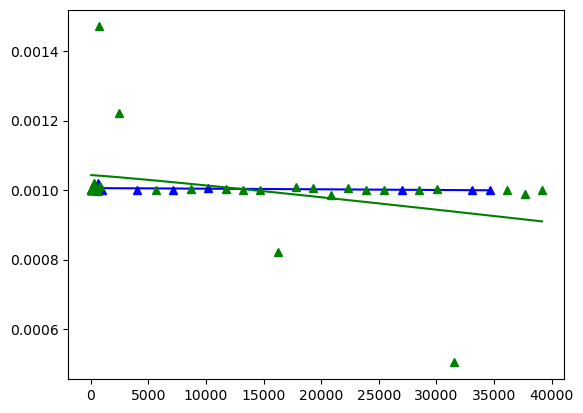

In [87]:
def mapping(x, a, c):
    return a * x * log2(x) + c

args, _ = curve_fit(mapping, array(list(graph_val1.keys())), array(list(graph_val1.values())))
a, c = args[0], args[1]
y_fit = a * array(list(graph_val1.keys())) * log2(array(list(graph_val1.keys()))) + c

print(a, 'xlog(x) + ', c, sep='')
plt.plot(array(list(graph_val1.keys())), y_fit, 'b')
plt.plot(graph_val1.keys(), graph_val1.values(), 'b^')

args, _ = curve_fit(mapping, array(list(graph_val2.keys())), array(list(graph_val2.values())))
a, c = args[0], args[1]
y_fit = a * array(list(graph_val2.keys())) * log2(array(list(graph_val2.keys()))) + c

print(a, 'xlog(x) + ', c, sep='')
plt.plot(array(list(graph_val2.keys())), y_fit, 'g')
plt.plot(graph_val2.keys(), graph_val2.values(), 'g^')

In [57]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from numpy import array, log, log10

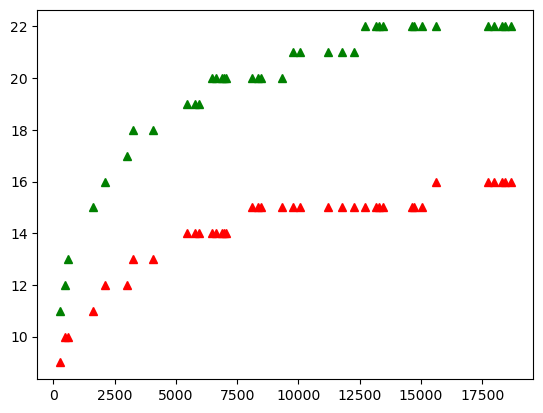

In [45]:
plt.plot(graph_val1.keys(), graph_val1.values(), 'b^')

plt.plot(graph_val2.keys(), graph_val2.values(), 'g^')

plt.plot(graph_val3.keys(), graph_val3.values(), 'r^')

650.6735069113463log(x) + -4429.367276795352
0.10481351183809295x + 326.6176635819812


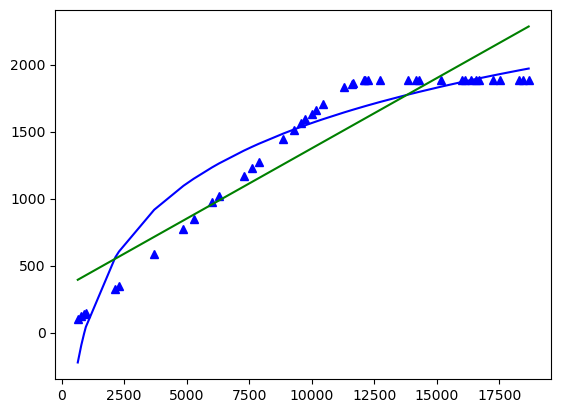

In [15]:
def mapping(x, a, c):
    return a * log(x) + c
def mapping2(x, a, c):
    return a * x + c

args, _ = curve_fit(mapping, array(list(graph_val1.keys())), array(list(graph_val1.values())))
a, c = args[0], args[1]
y_fit = a * log(array(list(graph_val1.keys()))) + c

print(a, 'log(x) + ', c, sep='')
plt.plot(array(list(graph_val1.keys())), y_fit, 'b')
plt.plot(graph_val1.keys(), graph_val1.values(), 'b^')

args, _ = curve_fit(mapping2, array(list(graph_val1.keys())), array(list(graph_val1.values())))
a, c = args[0], args[1]
y_fit = a * array(list(graph_val1.keys())) + c

print(a, 'x + ', c, sep='')
plt.plot(array(list(graph_val1.keys())), y_fit, 'g')